In [10]:
# Let's load the deeplifting data

In [11]:
%cd ../..

/Users/ryandevera/data-science


In [23]:
import glob
import pandas as pd
import seaborn as sns

In [34]:
file_path = '/Users/ryandevera/data-science/umn_environments/Deeplifting/high-dimension-search-results/2023-10-17-11-lennard_jones_6d/*'
files = glob.glob(file_path)
files

['/Users/ryandevera/data-science/umn_environments/Deeplifting/high-dimension-search-results/2023-10-17-11-lennard_jones_6d/2-layer-128-sum-0-pytorch-lbfgs-sine-sine-False-input-size-1.parquet',
 '/Users/ryandevera/data-science/umn_environments/Deeplifting/high-dimension-search-results/2023-10-17-11-lennard_jones_6d/3-layer-128-sum-2-pygranso-sine-sine-False-input-size-1.parquet',
 '/Users/ryandevera/data-science/umn_environments/Deeplifting/high-dimension-search-results/2023-10-17-11-lennard_jones_6d/2-layer-128-sum-0-pytorch-adam-sine-sine-False-input-size-1.parquet',
 '/Users/ryandevera/data-science/umn_environments/Deeplifting/high-dimension-search-results/2023-10-17-11-lennard_jones_6d/2-layer-128-sum-0-pygranso-sine-sine-False-input-size-1.parquet',
 '/Users/ryandevera/data-science/umn_environments/Deeplifting/high-dimension-search-results/2023-10-17-11-lennard_jones_6d/2-layer-128-sum-1-pytorch-lbfgs-sine-sine-True-input-size-1.parquet',
 '/Users/ryandevera/data-science/umn_envir

In [35]:
data = pd.read_parquet(files)

In [36]:
data

,x1,x2,x3,x4,x5,x6,f,f_initial,algorithm,total_time,...,num_layers,num_neurons,hidden_activation,output_activation,agg_function,include_bn,problem_name,global_minimum,dimensions,hits
0,0.379283,1.718384,1.314786,0.325172,0.601069,1.222050,-1.000000,-0.023194,Deeplifting-LBFGS,25.600796,...,2,128,sine,sine,sum,False,lennard_jones_6d,-1.0,6,True
1,-0.288713,2.897901,0.795392,-1.260248,3.429226,1.028494,-0.997744,-0.023142,Deeplifting,0.441483,...,3,128,sine,sine,sum,False,lennard_jones_6d,-1.0,6,False
2,-1.325381,0.442259,-3.743613,0.633380,-3.937433,-0.550880,-0.000109,-0.023194,Adam,26.177053,...,2,128,sine,sine,sum,False,lennard_jones_6d,-1.0,6,False
3,0.350058,1.695064,2.461571,0.243956,1.704802,1.344177,-1.000000,-0.023142,Deeplifting,0.216293,...,2,128,sine,sine,sum,False,lennard_jones_6d,-1.0,6,True
4,0.379635,1.718962,1.250482,0.281602,0.600956,1.231176,-1.000000,-0.023199,Deeplifting-LBFGS,26.687322,...,2,128,sine,sine,sum,True,lennard_jones_6d,-1.0,6,True
5,1.407370,1.464796,3.988128,-0.464398,1.280047,-1.788577,-0.000080,-0.023199,Adam,32.581268,...,2,128,sine,sine,sum,True,lennard_jones_6d,-1.0,6,False
6,0.436223,1.720670,1.561790,0.221034,0.664449,1.198167,-0.994036,-0.023142,Deeplifting,0.201413,...,2,128,sine,sine,sum,True,lennard_jones_6d,-1.0,6,False


In [37]:
# We have the number of layers and the number of neurons so we should be able to make a
# performance profile or heat map regarding complexity
# Let's also add another model

In [38]:
complexity_df = (
    data.loc[data['algorithm'] == 'Deeplifting']
    .groupby(['algorithm', 'num_layers', 'num_neurons'])['hits']
    .mean()
    .reset_index()
    .pivot_table(index='num_layers', columns='num_neurons', values='hits')
)

<Axes: xlabel='num_neurons', ylabel='num_layers'>

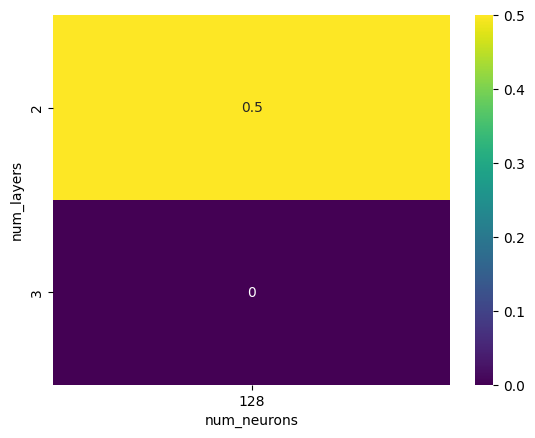

In [39]:
sns.heatmap(complexity_df, annot=True, cmap='viridis')

In [31]:
low_dimensional_problem_names = [
    'ackley',
    'ackley2',
    'ackley3',
    'adjiman',
    'alpine1',
    'alpine2',
    'bartels_conn',
    'beale',
    'bird',
    'bohachevsky1',
    'bohachevsky2',
    'bohachevsky3',
    'booth',
    'branin_rcos',
    'brent',
    'bukin_n2',
    'bukin_n4',
    'bukin_n6',
    'camel_3hump',
    'camel_6hump',
    'chung_reynolds',
    'cross_in_tray',
    'cross_leg_table',
    'crowned_cross',
    # 'cube',
    'drop_wave',
    'eggholder',
    # 'ex8_1_1',
    'griewank',
    'holder_table',
    'levy',
    'levy_n13',
    'mathopt6',
    'rastrigin',
    'rosenbrock',
    'schaffer_n2',
    'schaffer_n4',
    'schwefel',
    'shubert',
    'rosenbrock',
    'xinsheyang_n2',
    'xinsheyang_n3',
]

In [32]:
len(low_dimensional_problem_names)

40